In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression


# Lokalen Pfad der .py-Datei ermitteln
#script_dir = os.path.dirname(os.path.abspath(__file__))

script_dir = os.getcwd()  # Gets the current working directory
# Dynamischer Pfad für das Einlesen der CSV-Datei
input_file = os.path.join(script_dir, 'autoscout24_vehicles_generation.csv')

# Prüfen, ob die Datei existiert, bevor sie geladen wird
if not os.path.exists(input_file):
    print(f"Fehler: Die Datei '{input_file}' wurde nicht gefunden!")
else:
    # CSV-Datei einlesen
    df = pd.read_csv(input_file, delimiter=';', encoding='utf-8')
    print("Datei erfolgreich geladen.")

# Konvertiere Daten-Format
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

display(df)

Datei erfolgreich geladen.


,ID,Manufacturer,Title,Price,Mileage,Location,Transmission,Year,Fuel,Horsepower,Model,Generation,Model_Gen
0,6e920454-ec0e-4512-98e8-06888657dc23,Mercedes-Benz,Mercedes-Benz C 43 AMG 4Matic Night Edition ST...,34800,111340,Jan Stier • DE-72116 Mössingen,Automatik,2018-01-01,Benzin,367,C43,1. Gen,C43 - 1. Gen
1,a6e2e80c-417e-46d4-a60a-0a09f647be06,Mercedes-Benz,Mercedes-Benz C 300 Cab. +KAMERA+Memory+AMG+Sp...,40980,17700,Team CRM/Online • DE-25462 Rellingen,Automatik,2020-07-01,Benzin,258,C300,2. Gen,C300 - 2. Gen
2,3f151948-13c4-4210-8a27-e11a54adf089,Mercedes-Benz,Mercedes-Benz C 200 CABRIO AMG HEAD UP-NIGHT-K...,39999,24325,Verkaufsteam Autohaus Perez • DE-64823 Gross-U...,Automatik,2023-04-01,Benzin,197,C200,2. Gen,C200 - 2. Gen
3,9730a522-6fde-4ab0-88cb-061db5a71d13,Mercedes-Benz,Mercedes-Benz C 43 AMG C 43 AMG Comand/Memo/Ke...,41630,102961,DE-15517 Fürstenwalde,Automatik,2020-03-01,Benzin,390,C43,2. Gen,C43 - 2. Gen
4,b7e3527b-6ee9-49f2-901c-c378e0e5bd6f,Mercedes-Benz,Mercedes-Benz C 180 CABRIO AMG LINE NAVI AIRSC...,29490,28800,Francois Graff • DE-21502 Geesthacht,Automatik,2018-06-01,Benzin,156,C180,1. Gen,C180 - 1. Gen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,9718edb8-b453-4b16-a596-ba094249a8d4,Mercedes-Benz,Mercedes-Benz C 180 Cabrio *2. Hd + LED + Spor...,30900,33720,Markus Fröhlich • DE-61169 Friedberg,Automatik,2016-09-01,Benzin,156,C180,1. Gen,C180 - 1. Gen
480,8227c2b3-199d-4b00-bd8f-46406fff8a61,Mercedes-Benz,Mercedes-Benz C 180 C180 Cabrio AMG Line *Dist...,26950,84000,Ralf Sommer • DE-42781 Haan,Automatik,2017-09-01,Benzin,156,C180,1. Gen,C180 - 1. Gen
481,46ab8f23-c28c-41c9-ac9a-843515befd62,Mercedes-Benz,Mercedes-Benz C 200 C 200 Cabriolet AMG Line/N...,27830,103436,Sabrina Bäger • DE-04720 Döbeln,Automatik,2016-11-01,Benzin,184,C200,1. Gen,C200 - 1. Gen
482,58aa1354-2d52-4c36-a44f-2f973330bbfa,Mercedes-Benz,Mercedes-Benz C 200 Cabrio 9G-TRONIC AMG Line ...,28999,88500,Ben Cantarero Exposito • DE-65830 Kriftel,Automatik,2017-05-01,Benzin,184,C200,1. Gen,C200 - 1. Gen


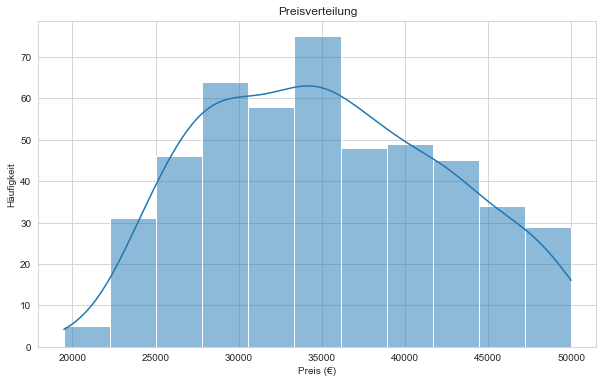

In [38]:
# Optional: Weitere Schritte oder Plots
# Beispiel: Histogramm für Preisverteilung aller Fahrzeuge im df
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], kde=True)
plt.title('Preisverteilung')
plt.xlabel('Preis (€)')
plt.ylabel('Häufigkeit')
plt.show()

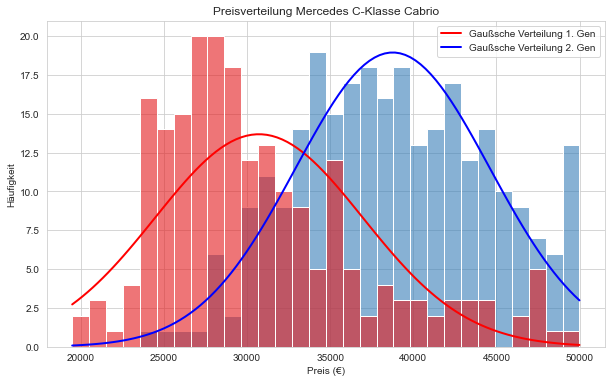

In [43]:
# Stil setzen
sns.set_style("whitegrid")

# Wähle die Farben, die für die Generationen im Histogramm verwendet werden
palette = sns.color_palette("Set1", n_colors=2)

# Unterteilung der Daten nach Generation
df_gen1 = df[df['Generation'] == '1. Gen']
df_gen2 = df[df['Generation'] == '2. Gen']

# Berechnung des Mittelwerts und der Standardabweichung für jede Generation
mean_gen1 = df_gen1['Price'].mean()
std_dev_gen1 = df_gen1['Price'].std()

mean_gen2 = df_gen2['Price'].mean()
std_dev_gen2 = df_gen2['Price'].std()

# Erzeugen von Werten für die Gaußsche Verteilung
x_vals = np.linspace(df['Price'].min(), df['Price'].max(), 100)
y_vals_gen1 = stats.norm.pdf(x_vals, mean_gen1, std_dev_gen1) * len(df_gen1) * (df['Price'].max() - df['Price'].min()) / 30
y_vals_gen2 = stats.norm.pdf(x_vals, mean_gen2, std_dev_gen2) * len(df_gen2) * (df['Price'].max() - df['Price'].min()) / 30

# Histogramm für Preisverteilung
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Price', hue='Generation', bins=30, kde=False, alpha=0.6,palette=palette)

# Gaußsche Verteilungen hinzufügen
plt.plot(x_vals, y_vals_gen1, color='red', linewidth=2, label='Gaußsche Verteilung 1. Gen')
plt.plot(x_vals, y_vals_gen2, color='blue', linewidth=2, label='Gaußsche Verteilung 2. Gen')

# Achsentitel und Legende setzen
plt.xlabel('Preis (€)')
plt.ylabel('Häufigkeit')
plt.title('Preisverteilung Mercedes C-Klasse Cabrio')
plt.legend()

# Grafik anzeigen
plt.show()

C300 price at 50,000 km: 37874.11€
C300 price at 100,000 km: 34697.68€
C300 price difference: -3176.43€
C200 price at 50,000 km: 34663.27€
C200 price at 100,000 km: 30616.45€
C200 price difference: -4046.82€


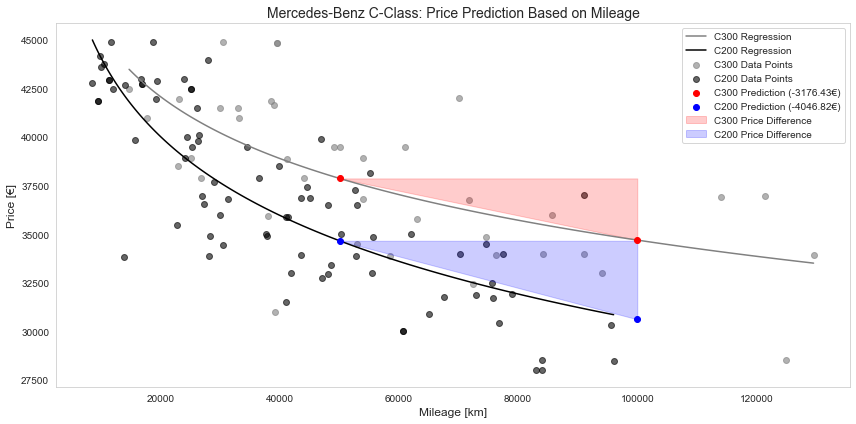

In [41]:
# Schritt 1: Filterung der Daten - Beliebe Filter einstellen
df_filtered_c300 = df[#(df['Mileage'] <= 200000) & (df['Year'] <= "01.01.2023") & (df['Year'] >= "01.01.2019") & 
                      (df['Model_Gen'] == "C300 - 2. Gen") & (df['Price'] <= 45000)].dropna(subset=['Price', 'Mileage'])
df_filtered_c200 = df[#(df['Mileage'] <= 200000) & (df['Year'] <= "01.01.2023") & (df['Year'] >= "01.01.2019") & 
                      (df['Model_Gen'] == "C200 - 2. Gen") & (df['Price'] <= 45000)].dropna(subset=['Price', 'Mileage'])

# Umwandlung in numerische Werte
X_c300 = df_filtered_c300[['Mileage']]
y_c300 = df_filtered_c300['Price']

X_c200 = df_filtered_c200[['Mileage']]
y_c200 = df_filtered_c200['Price']

# Schritt 2: Logarithmische Transformation und lineare Regression
X_c300_log = np.log(X_c300)
X_c200_log = np.log(X_c200)

model_c300 = LinearRegression()
model_c300.fit(X_c300_log, y_c300)

model_c200 = LinearRegression()
model_c200.fit(X_c200_log, y_c200)

# Schritt 3: Vorhersagen für 50.000 km und 100.000 km
mileage_values = np.array([50000, 100000])
mileage_log = np.log(mileage_values)

predicted_price_c300 = model_c300.predict(mileage_log.reshape(-1, 1))
predicted_price_c200 = model_c200.predict(mileage_log.reshape(-1, 1))

price_diff_c300 = predicted_price_c300[1] - predicted_price_c300[0]
price_diff_c200 = predicted_price_c200[1] - predicted_price_c200[0]

# Ausgabe der Ergebnisse
print(f"C300 price at 50,000 km: {predicted_price_c300[0]:.2f}€")
print(f"C300 price at 100,000 km: {predicted_price_c300[1]:.2f}€")
print(f"C300 price difference: {price_diff_c300:.2f}€")

print(f"C200 price at 50,000 km: {predicted_price_c200[0]:.2f}€")
print(f"C200 price at 100,000 km: {predicted_price_c200[1]:.2f}€")
print(f"C200 price difference: {price_diff_c200:.2f}€")

# Schritt 4: Visualisierung mit Matplotlib
plt.figure(figsize=(12, 6))

# Streudiagramme
plt.scatter(df_filtered_c300['Mileage'], df_filtered_c300['Price'], color='gray', label='C300 Data Points', alpha=0.6)
plt.scatter(df_filtered_c200['Mileage'], df_filtered_c200['Price'], color='black', label='C200 Data Points', alpha=0.6)

# Regressionslinien
X_grid_c300_log = np.linspace(X_c300_log.min(), X_c300_log.max(), 100).reshape(-1, 1)
y_grid_c300 = model_c300.predict(X_grid_c300_log)
plt.plot(np.exp(X_grid_c300_log), y_grid_c300, color='gray', label='C300 Regression')

X_grid_c200_log = np.linspace(X_c200_log.min(), X_c200_log.max(), 100).reshape(-1, 1)
y_grid_c200 = model_c200.predict(X_grid_c200_log)
plt.plot(np.exp(X_grid_c200_log), y_grid_c200, color='black', label='C200 Regression')

# Vorhersagepunkte und Highlights
plt.scatter(mileage_values, predicted_price_c300, color='red', label=f'C300 Prediction ({price_diff_c300:.2f}€)', zorder=5)
plt.scatter(mileage_values, predicted_price_c200, color='blue', label=f'C200 Prediction ({price_diff_c200:.2f}€)', zorder=5)

# Dreiecke für Preisdifferenz (Highlight)
plt.fill_between([50000, 100000], [predicted_price_c300[0], predicted_price_c300[0]], 
                 [predicted_price_c300[0], predicted_price_c300[1]], color='red', alpha=0.2, label='C300 Price Difference')
plt.fill_between([50000, 100000], [predicted_price_c200[0], predicted_price_c200[0]], 
                 [predicted_price_c200[0], predicted_price_c200[1]], color='blue', alpha=0.2, label='C200 Price Difference')

# Achsenbeschriftung und Legende
plt.title('Mercedes-Benz C-Class: Price Prediction Based on Mileage', fontsize=14)
plt.xlabel('Mileage [km]', fontsize=12)
plt.ylabel('Price [€]', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Anzeige des Plots
plt.tight_layout()
plt.show()
